# Bharat Ramchire (PGDA16)

Airline customer satisfaction project, in this project we will predict the customer satisfaction. From the airline data by doing the classification analysis we can say that wheather the customer is satisfied or not and also we can get the other parameters which  impacting the customer satisfaction and what factor contribute to customer satisfaction. 

## DATA DEFINATION
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Importing the required libraries


In [70]:
import numpy as np # 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import pandas as pd # 'Pandas' is used for data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data and displayin the data

In [71]:
train = pd.read_csv('C:/Users/HP/Desktop/python/project/train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/python/project/test.csv')  

In [72]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [73]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


There are couple of columns that are unnecessary, such as 'Unnamed:0' and 'id'. We can drop these.

In [74]:
train.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
test.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [75]:
train.drop(labels=["id"],axis=1,inplace=True)


In [76]:
train.shape

(103904, 23)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [78]:
test.shape

(25976, 24)

In [79]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [80]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [81]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]

In [82]:
test.columns = [c.replace(' ', '_') for c in test.columns]

From the data 22 independent variable and 1 target variable i.e satisfaction have two classes so we convert it to 0 and 1

In [83]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [84]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

 checking for imbalance of the categorical ariable

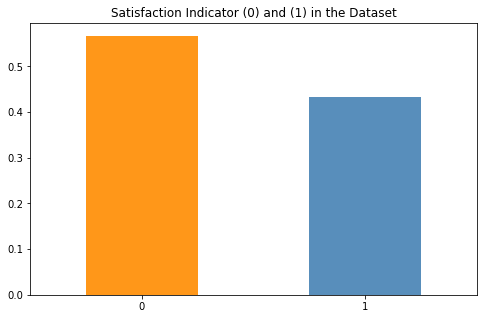

In [85]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

In [86]:
train.isna().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

Arrival_Delay_in_Minutes has NA values so replacing the NA values with

In [87]:
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [88]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [89]:
train.isna().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

so now there ate no NA values in data

## Exploratory data analysis

univariate analysis

Categorical Variables: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.

Numerical Variables:Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

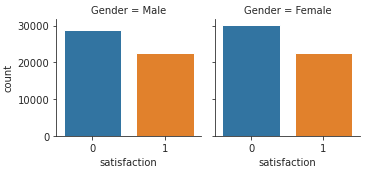

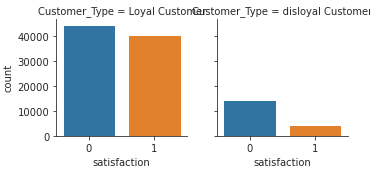

In [90]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

Gender: It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

Customer Type: Loyal passengers are very high in number

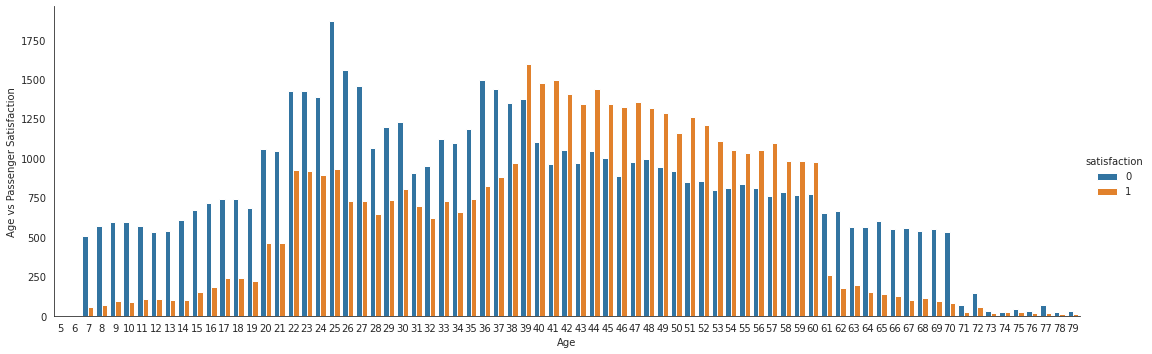

In [91]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

Age: From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

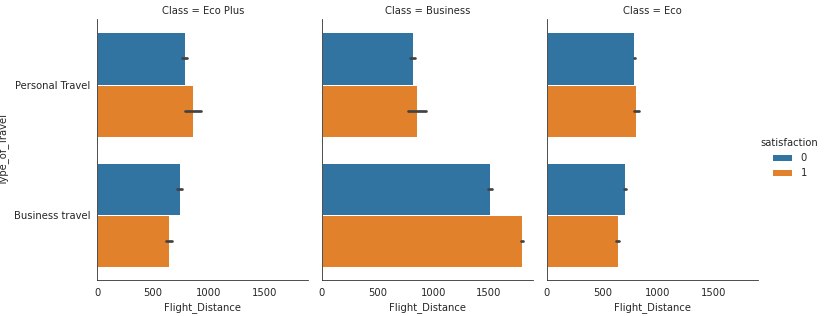

In [92]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Type of Travel, Class, Flight Distance: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

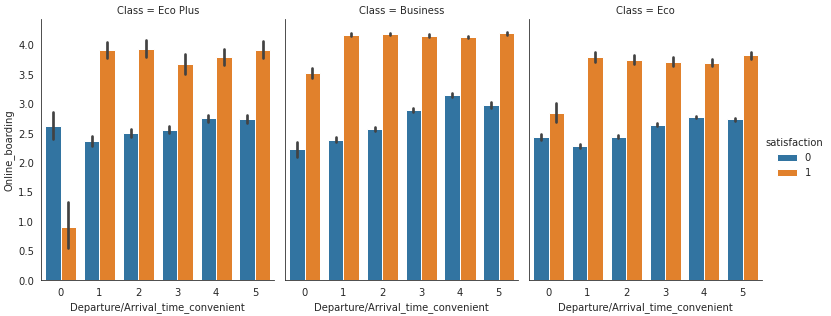

In [93]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

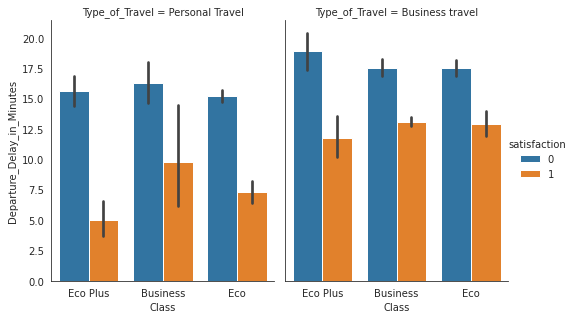

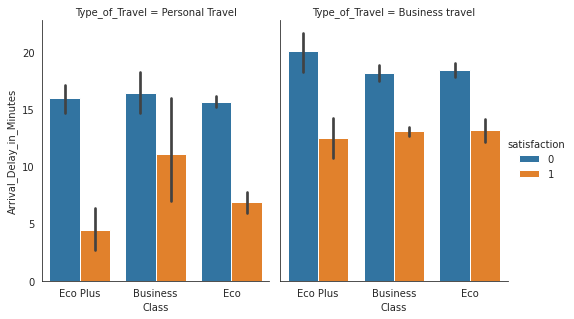

In [94]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

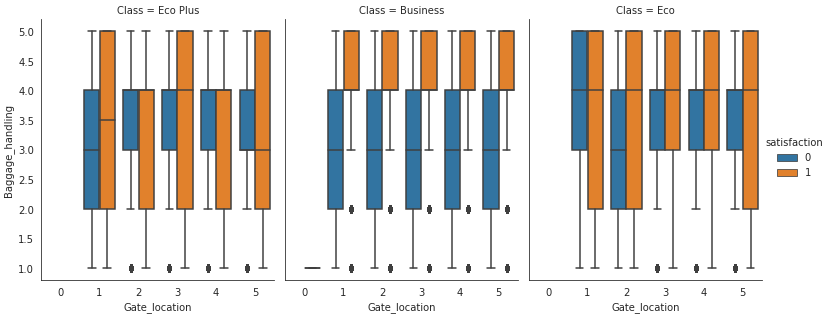

In [95]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

Baggage Handling, Gate Location grouped by Class: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

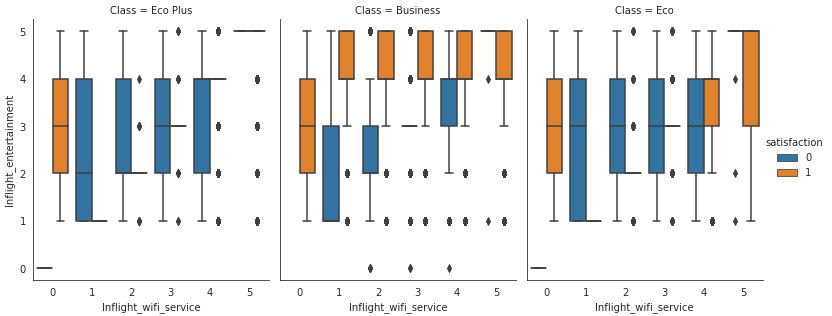

In [96]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

Inflight Entertainment, Inflight wi-fi Service grouped by Class: It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

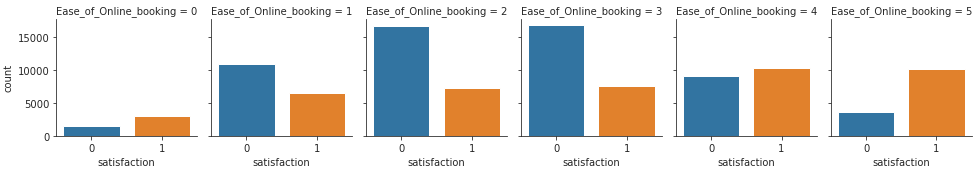

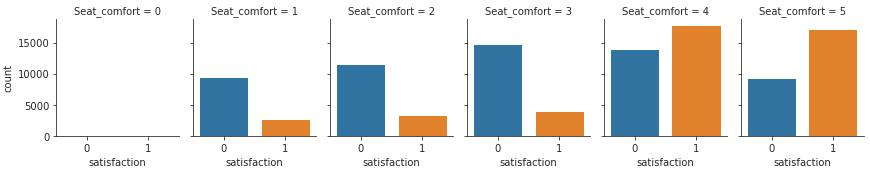

In [97]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)
    

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)    
    

for the variables Ease_of_Online_booking,Seat_comfort maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied

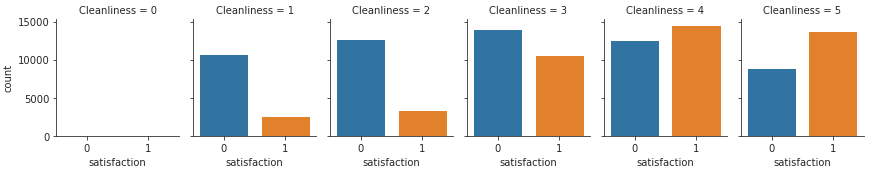

In [98]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

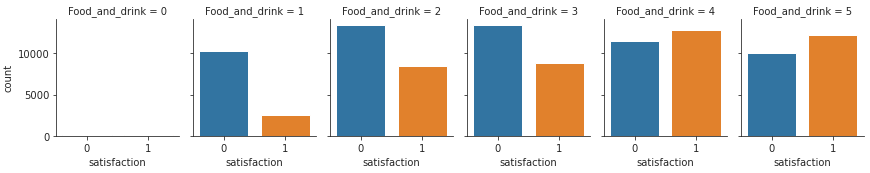

In [99]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

for the variables Cleanliness, Food and Drink  maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied

Value counts of each categorical variables

In [100]:
def bar_plot(variable):
    
    var=train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

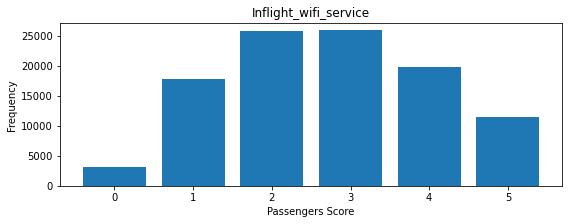

Inflight_wifi_service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight_wifi_service, dtype: int64


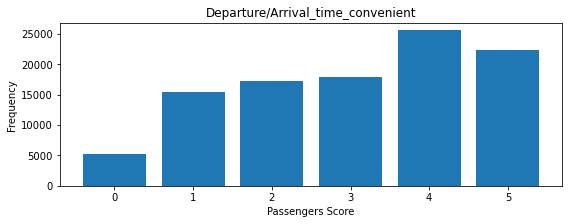

Departure/Arrival_time_convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival_time_convenient, dtype: int64


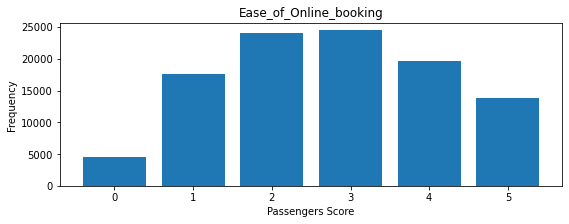

Ease_of_Online_booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease_of_Online_booking, dtype: int64


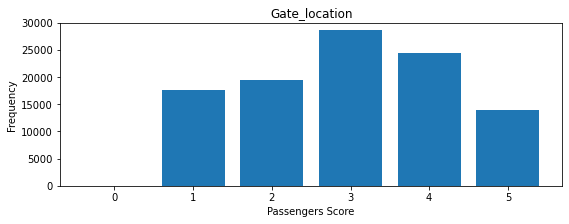

Gate_location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate_location, dtype: int64


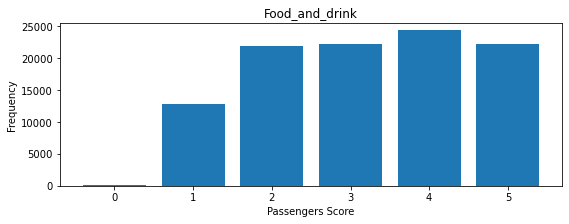

Food_and_drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food_and_drink, dtype: int64


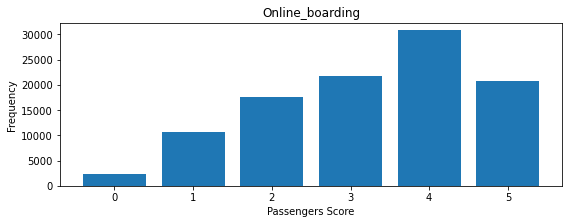

Online_boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online_boarding, dtype: int64


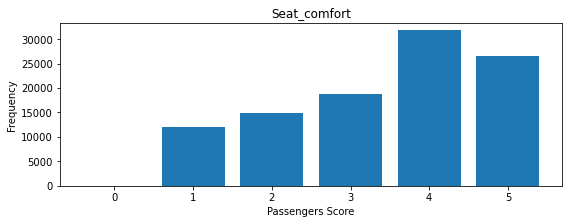

Seat_comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat_comfort, dtype: int64


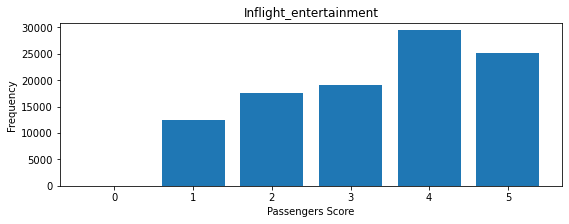

Inflight_entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight_entertainment, dtype: int64


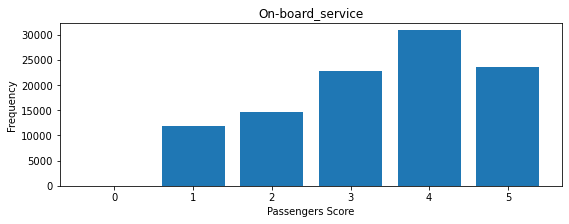

On-board_service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board_service, dtype: int64


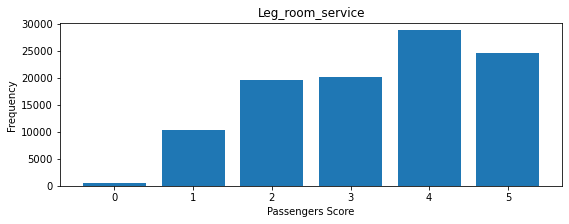

Leg_room_service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg_room_service, dtype: int64


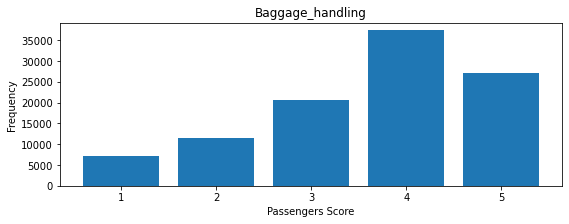

Baggage_handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage_handling, dtype: int64


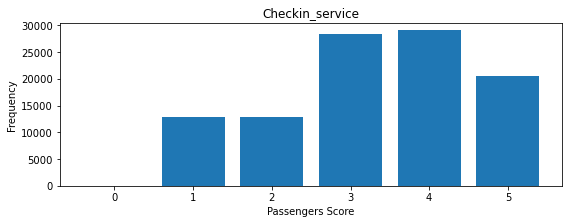

Checkin_service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin_service, dtype: int64


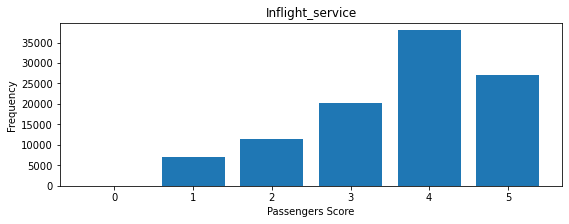

Inflight_service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight_service, dtype: int64


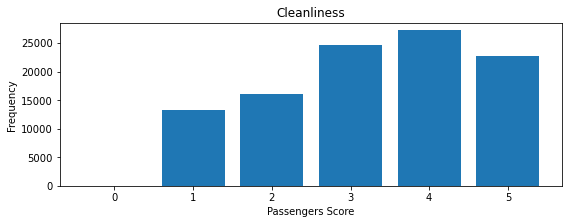

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


In [101]:
category_var1=["Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Baggage_handling", "Checkin_service", "Inflight_service", "Cleanliness",]
for c in category_var1:
    bar_plot(c)

In [102]:
category_var2=["Gender", "Customer_Type", "Type_of_Travel", "Class","satisfaction"]
for c in category_var2:
    print("{} \n".format(train[c].value_counts()))

Female    52727
Male      51177
Name: Gender, dtype: int64 

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64 

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64 

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 

0    58879
1    45025
Name: satisfaction, dtype: int64 



Histogram for the continious variables

In [103]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

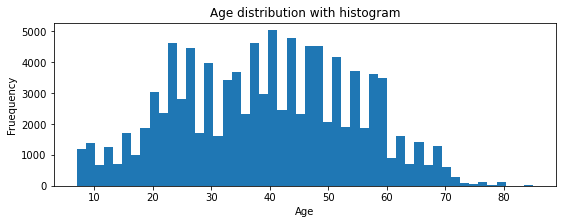

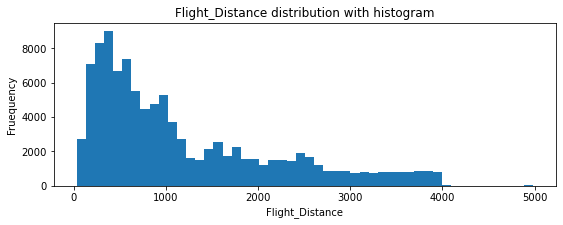

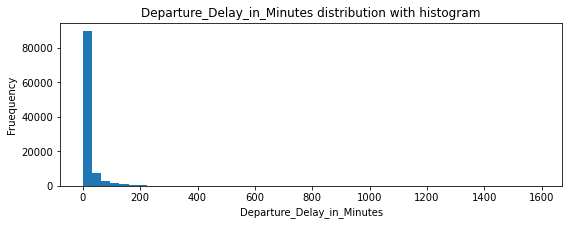

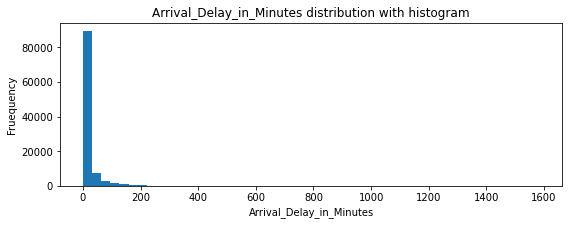

In [104]:
numeric_Var=["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
for n in numeric_Var:
    plot_hist(n)

Label encoding for categorical variables

In [105]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [106]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

Outliers detection and treatment for the outliers

In [107]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [108]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

Correlation among the variables

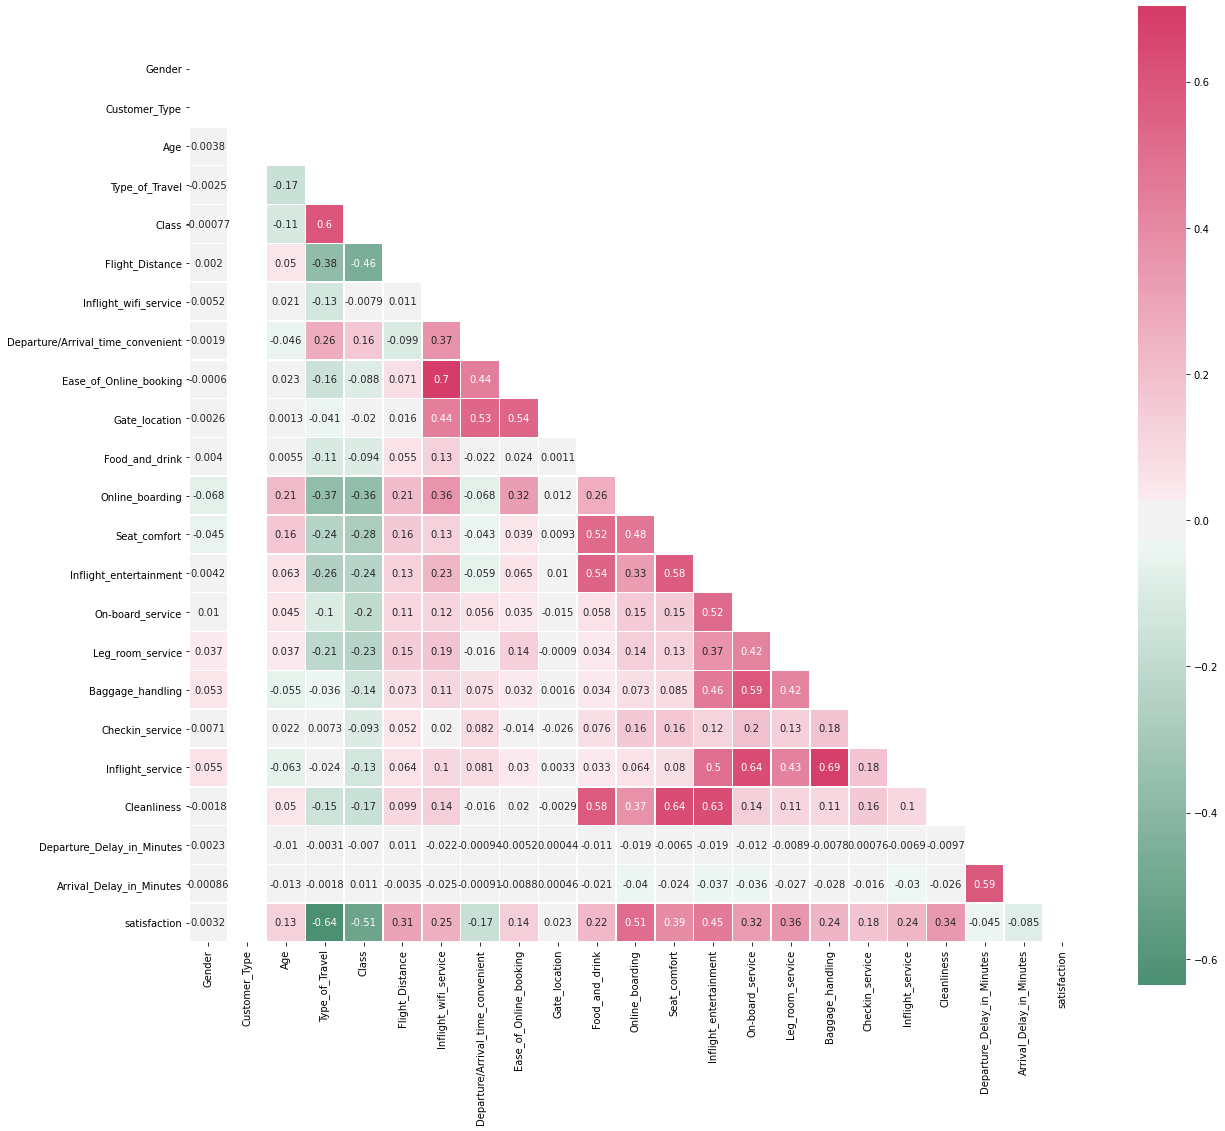

In [109]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

Feature engineering for the continious variables

In [110]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


Top 10 Feature Selection through Chi-Square

In [111]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


# Building the models 

In [112]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

In [113]:
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [114]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [115]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

# Logistic regression

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
Time taken = 0.17453527450561523
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



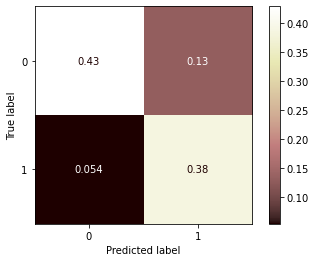

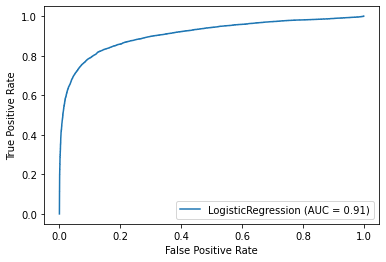

In [116]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [117]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.5533
Time:                        02:43:37   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value of 0.55 represents an excellent fit.

# Navie bayes classifier

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740687
Time taken = 0.05684638023376465
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



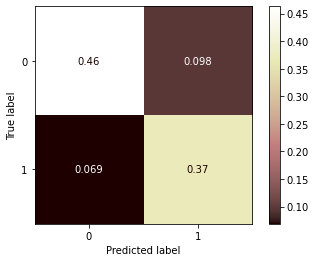

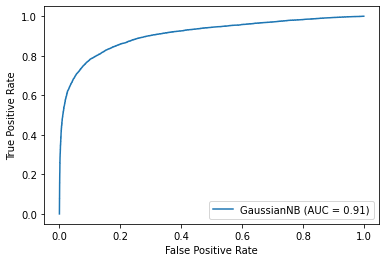

In [118]:
from sklearn.naive_bayes import GaussianNB
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

# KNN classifier

Accuracy = 0.8861256544502618
ROC Area under Curve = 0.8870270908506304
Time taken = 12.185260772705078
              precision    recall  f1-score   support

           0    0.91414   0.87964   0.89656     14573
           1    0.85326   0.89441   0.87335     11403

    accuracy                        0.88613     25976
   macro avg    0.88370   0.88703   0.88496     25976
weighted avg    0.88741   0.88613   0.88637     25976



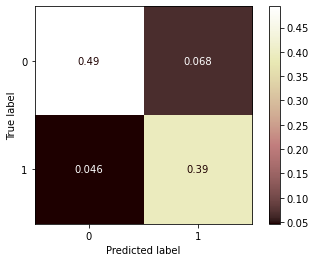

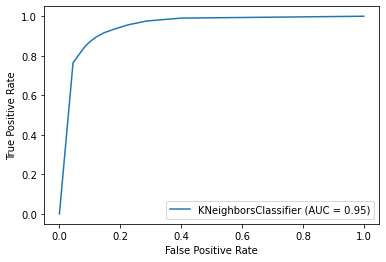

In [119]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

# Descision tree classifier

Accuracy = 0.8770788420080073
ROC Area under Curve = 0.8827699307021736
Time taken = 0.15876340866088867
              precision    recall  f1-score   support

           0    0.93803   0.83614   0.88416     14573
           1    0.81611   0.92940   0.86908     11403

    accuracy                        0.87708     25976
   macro avg    0.87707   0.88277   0.87662     25976
weighted avg    0.88451   0.87708   0.87754     25976



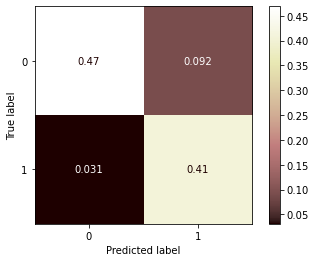

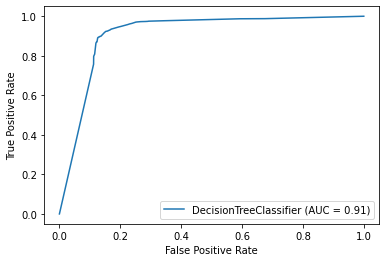

In [120]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Since Decision Tree is a white-box (explainable) model, we can deep-dive into its visualization to get more valuable insight below. From tree-visualization, we can extract rules which are contributing towards passenger-satisfaction.

# Random forest

Accuracy = 0.8941330458885125
ROC Area under Curve = 0.9003728693084586
Time taken = 10.64485764503479
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



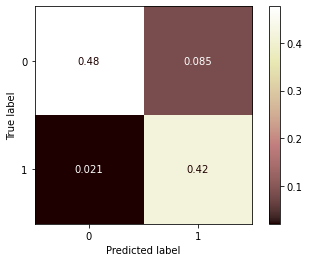

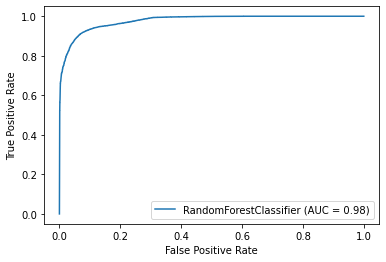

In [121]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see how many decision trees are minimally required make the Accuarcy consistent (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

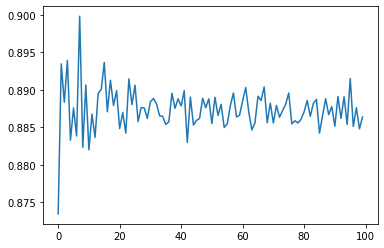

In [122]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, it is evident that minimum 40 trees are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations)

# Extreme gradient boosting

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.888820449645827
ROC Area under Curve = 0.8960196091950001
Time taken = 42.60072708129883
              precision    recall  f1-score   support

           0    0.95964   0.83703   0.89415     14573
           1    0.82096   0.95501   0.88293     11403

    accuracy                        0.88882     25976
   macro avg    0.89030   0.89602   0.88854     25976
weighted avg    0.89876   0.88882   0.88922     25976



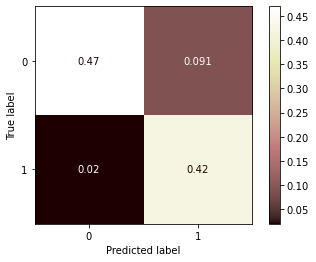

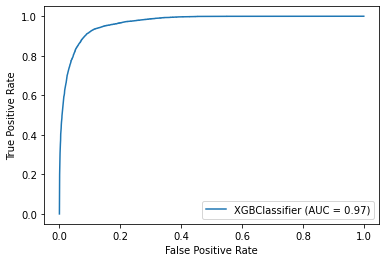

In [123]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Adaptive gradient boosting

Accuracy = 0.8955189405605174
ROC Area under Curve = 0.8996241085930146
Time taken = 27.822803020477295
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



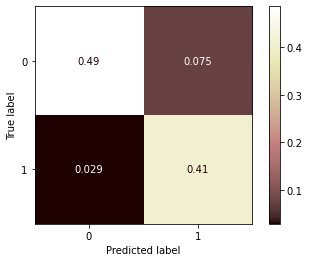

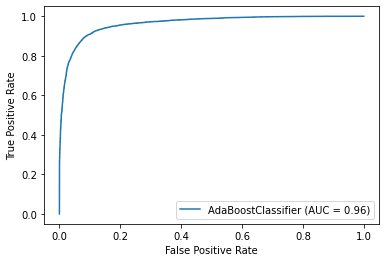

In [124]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

In [125]:
# Model comparisions

We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

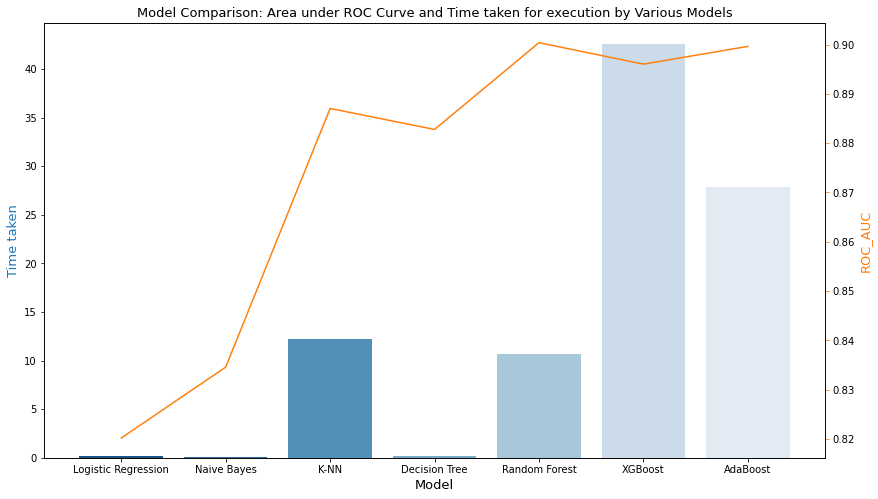

In [126]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree', 'Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

We observe, Random Forest and AdaBoost have performed equally well on producing high ROC_AUC score (90%). But Random Forest has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model

## Prediction on test data

In [127]:
test.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


In [128]:
test1=test[['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']]

In [129]:
test_satisfaction = pd.Series(model_rf.predict(test1), name = "satisfaction").astype(int)
results = pd.concat([test.id, test_satisfaction],axis = 1)
results.to_csv("satisfaction.csv", index = False)


In [130]:
results

,id,satisfaction
0,19556,1
1,90035,1
2,12360,1
3,77959,1
4,36875,1
...,...,...
25971,78463,1
25972,71167,1
25973,37675,1
25974,90086,1


In [131]:
results['satisfaction'].replace({0: 'neutral or dissatisfied', 1: 'satisfied'},inplace = True)

In [132]:
results

,id,satisfaction
0,19556,satisfied
1,90035,satisfied
2,12360,satisfied
3,77959,satisfied
4,36875,satisfied
...,...,...
25971,78463,satisfied
25972,71167,satisfied
25973,37675,satisfied
25974,90086,satisfied


In [133]:
results.to_csv("satisfaction.csv", index = False)

# Thank you